In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

<h3> Logistic Regression - Original Dataset without Outliers Normalized<h3>

In [2]:
df_no_outliers_normalized = pd.read_csv('../Final_Data_Set/Original Dataset without Outliers Normalized.csv')

In [3]:
X = df_no_outliers_normalized.drop(columns=['diabetes'])
y = df_no_outliers_normalized['diabetes']

X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,1.713008,0,1,-0.286437,1.134061,0.126046,-0.633042,-0.841116
1,0.560337,0,0,0.072849,1.134061,-1.523079,-0.633042,-0.841116
2,-0.592335,0,0,0.072849,0.232946,0.620784,-0.633042,1.188683
3,-0.237667,0,0,-0.579938,-0.467921,0.538328,1.579675,-0.841116
4,1.535674,1,1,-1.138266,-0.668169,0.538328,1.579675,1.188683
...,...,...,...,...,...,...,...,...
96303,1.713008,0,0,0.072849,0.733566,-1.248225,-0.633042,-0.841116
96304,-1.745006,0,0,-1.605507,1.033937,-0.973371,-0.633042,-0.841116
96305,1.092339,0,0,0.158875,0.232946,0.538328,1.579675,1.188683
96306,-0.769669,0,0,1.439149,-1.469161,-0.973371,-0.633042,-0.841116


In [6]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
#Initialize SMOTE
smote = SMOTE(random_state = 42)

# Apply SMOTE to the training dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [8]:
# Define hyperparameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], #Inverse of regularization strength
    'penalty': ['l1', 'l2'] #Type of regularization
}

# Fit into a Logistic Regression model
logreg = LogisticRegression(random_state = 42, max_iter = 1000, solver = 'liblinear')

# Perform Grid Search
logreg_gs = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')
logreg_gs.fit(X_train_resampled, y_train_resampled)

# Get Best Parameters
print("Best hpyerparameters:", logreg_gs.best_params_)

lr_pred = logreg_gs.predict(X_test)

Best hpyerparameters: {'C': 0.1, 'penalty': 'l2'}


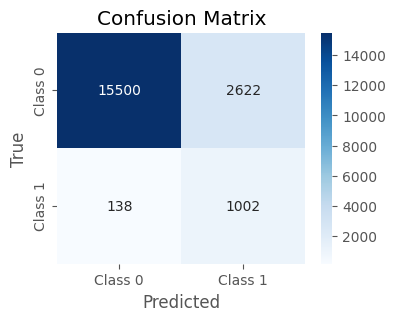

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, lr_pred)

# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [10]:
# Performance Evaluation 
print('Accuracy:')
accuracy = accuracy_score(y_test, lr_pred)
print(accuracy)

print('\nPrecision:')
precision = precision_score(y_test, lr_pred)
print(precision)

print('\nRecall:')
recall = recall_score(y_test, lr_pred)
print(recall)

print('\nF1 score:')
f1 = f1_score(y_test, lr_pred) 
print(f1)

print('\nROC AUC score:')
roc_auc = roc_auc_score(y_test, lr_pred)
print(roc_auc)

Accuracy:
0.8567126985775101

Precision:
0.2764900662251656

Recall:
0.8789473684210526

F1 score:
0.42065491183879095

ROC AUC score:
0.867130675712568


In [11]:
train_accuracy = accuracy_score(y_train_resampled, logreg_gs.predict(X_train_resampled))
print('Training Accuracy: ' + str(train_accuracy))

Training Accuracy: 0.8684126984126984


In [12]:
# Predictions
pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred}) \
    .sample(10)

,Actual,Predicted
4380,0,1
96104,0,0
60229,0,0
18838,0,1
20423,0,0
12295,0,0
95407,0,0
92558,0,0
85835,0,0
78906,0,0


In [13]:
results = pd.DataFrame([['Without outliers, Normalized data', train_accuracy, accuracy, precision, recall, f1, roc_auc]], 
                       columns = ['Logistic Regression Model', 'Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

summary = results
summary

,Logistic Regression Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,"Without outliers, Normalized data",0.868413,0.856713,0.27649,0.878947,0.420655,0.867131


<h3> Logistic Regression - Original Dataset with Outliers Included Normalized<h3>

In [14]:
df_with_outliers_normalized = pd.read_csv('../Final_Data_Set/Original Dataset with Outliers Included Normalized.csv')

In [15]:
X = df_with_outliers_normalized.drop(columns=['diabetes'])
y = df_with_outliers_normalized['diabetes']

X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,1.692577,0,1,-0.321051,1.001692,0.047709,-0.640425,-0.841175
1,0.537899,0,0,-0.000114,1.001692,-1.426157,-0.640425,-0.841175
2,-0.616779,0,0,-0.000114,0.161089,0.489869,-0.640425,1.188813
3,-0.261494,0,0,-0.583225,-0.492714,0.416175,1.561464,-0.841175
4,1.514935,1,1,-1.081957,-0.679515,0.416175,1.561464,1.188813
...,...,...,...,...,...,...,...,...
99977,1.692577,0,0,-0.000114,0.628091,-1.180513,-0.640425,-0.841175
99978,-1.771458,0,0,-1.499326,0.908292,-0.934869,-0.640425,-0.841175
99979,1.070828,0,0,0.076730,0.161089,0.416175,1.561464,1.188813
99980,-0.794422,0,0,1.220350,-1.426718,-0.934869,-0.640425,-0.841175


In [16]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
#Initialize SMOTE
smote = SMOTE(random_state = 42)

# Apply SMOTE to the training dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [18]:
# Define hyperparameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], #Inverse of regularization strength
    'penalty': ['l1', 'l2'] #Type of regularization
}

# Fit into a Logistic Regression model
logreg = LogisticRegression(random_state = 42, max_iter = 1000, solver = 'liblinear')

# Perform Grid Search
logreg_gs = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')
logreg_gs.fit(X_train_resampled, y_train_resampled)

# Get Best Parameters
print("Best hpyerparameters:", logreg_gs.best_params_)

lr_pred = logreg_gs.predict(X_test)

Best hpyerparameters: {'C': 0.1, 'penalty': 'l2'}


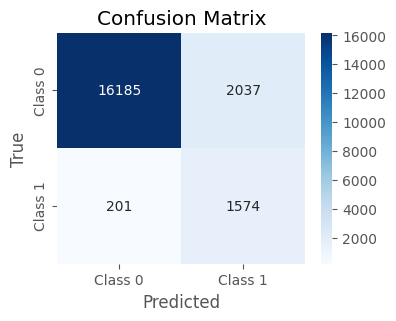

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, lr_pred)

# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [20]:
# Performance Evaluation 
print('Accuracy:')
accuracy = accuracy_score(y_test, lr_pred)
print(accuracy)

print('\nPrecision:')
precision = precision_score(y_test, lr_pred)
print(precision)

print('\nRecall:')
recall = recall_score(y_test, lr_pred)
print(recall)

print('\nF1 score:')
f1 = f1_score(y_test, lr_pred) 
print(f1)

print('\nROC AUC score:')
roc_auc = roc_auc_score(y_test, lr_pred)
print(roc_auc)

Accuracy:
0.8880832124818723

Precision:
0.43589033508723346

Recall:
0.8867605633802816

F1 score:
0.584478277014482

ROC AUC score:
0.8874863073733809


In [21]:
train_accuracy = accuracy_score(y_train_resampled, logreg_gs.predict(X_train_resampled))
print('Training Accuracy: ' + str(train_accuracy))

Training Accuracy: 0.8841523341523342


In [22]:
# Predictions
pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred}) \
    .sample(10)

,Actual,Predicted
524,0,0
59505,0,1
76321,0,1
65398,0,0
25535,0,1
83171,0,1
79100,0,0
87083,0,0
80235,0,0
60933,0,0


In [23]:
results = pd.DataFrame([['With outliers, Normalized data', train_accuracy, accuracy, precision, recall, f1, roc_auc]], 
                       columns = ['Logistic Regression Model', 'Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

summary = pd.concat([summary, results], ignore_index=True)
summary

,Logistic Regression Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,"Without outliers, Normalized data",0.868413,0.856713,0.27649,0.878947,0.420655,0.867131
1,"With outliers, Normalized data",0.884152,0.888083,0.43589,0.886761,0.584478,0.887486


<h3> Logistic Regression - Original Dataset without Outliers<h3>

In [24]:
df_no_outliers = pd.read_csv('../Final_Data_Set/Original Dataset without Outliers.csv')

In [25]:
X = df_no_outliers.drop(columns=['diabetes'])
y = df_no_outliers['diabetes']

X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,80.0,0,1,25.19,6.6,140,-0.247356,-0.128959
1,54.0,0,0,27.32,6.6,80,-0.247356,-0.128959
2,28.0,0,0,27.32,5.7,158,-0.247356,0.160772
3,36.0,0,0,23.45,5.0,155,0.452953,-0.128959
4,76.0,1,1,20.14,4.8,155,0.452953,0.160772
...,...,...,...,...,...,...,...,...
96303,80.0,0,0,27.32,6.2,90,-0.247356,-0.128959
96304,2.0,0,0,17.37,6.5,100,-0.247356,-0.128959
96305,66.0,0,0,27.83,5.7,155,0.452953,0.160772
96306,24.0,0,0,35.42,4.0,100,-0.247356,-0.128959


In [26]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
#Initialize SMOTE
smote = SMOTE(random_state = 42)

# Apply SMOTE to the training dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [28]:
# Define hyperparameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], #Inverse of regularization strength
    'penalty': ['l1', 'l2'] #Type of regularization
}

# Fit into a Logistic Regression model
logreg = LogisticRegression(random_state = 42, max_iter = 1000, solver = 'liblinear')

# Perform Grid Search
logreg_gs = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')
logreg_gs.fit(X_train_resampled, y_train_resampled)

# Get Best Parameters
print("Best hpyerparameters:", logreg_gs.best_params_)

lr_pred = logreg_gs.predict(X_test)

Best hpyerparameters: {'C': 1, 'penalty': 'l2'}


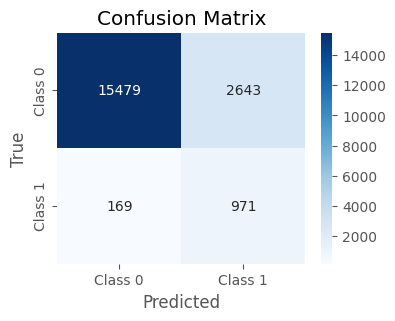

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, lr_pred)

# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [30]:
# Performance Evaluation 
print('Accuracy:')
accuracy = accuracy_score(y_test, lr_pred)
print(accuracy)

print('\nPrecision:')
precision = precision_score(y_test, lr_pred)
print(precision)

print('\nRecall:')
recall = recall_score(y_test, lr_pred)
print(recall)

print('\nF1 score:')
f1 = f1_score(y_test, lr_pred) 
print(f1)

print('\nROC AUC score:')
roc_auc = roc_auc_score(y_test, lr_pred)
print(roc_auc)

Accuracy:
0.8540130827536081

Precision:
0.26867736579966794

Recall:
0.8517543859649123

F1 score:
0.40849810685738325

ROC AUC score:
0.8529547782379466


In [31]:
train_accuracy = accuracy_score(y_train_resampled, logreg_gs.predict(X_train_resampled))
print('Training Accuracy: ' + str(train_accuracy))

Training Accuracy: 0.870448585231194


In [32]:
# Predictions
pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred}) \
    .sample(10)

,Actual,Predicted
57323,0,0
11371,0,1
23062,0,0
19160,0,0
48497,0,0
63068,0,0
3235,0,0
93176,0,0
74162,0,0
58025,0,1


In [33]:
results = pd.DataFrame([['Without outliers, Non-normalized data', train_accuracy, accuracy, precision, recall, f1, roc_auc]], 
                       columns = ['Logistic Regression Model', 'Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

summary = pd.concat([summary, results], ignore_index=True)
summary

,Logistic Regression Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,"Without outliers, Normalized data",0.868413,0.856713,0.276490,0.878947,0.420655,0.867131
1,"With outliers, Normalized data",0.884152,0.888083,0.435890,0.886761,0.584478,0.887486
2,"Without outliers, Non-normalized data",0.870449,0.854013,0.268677,0.851754,0.408498,0.852955


<h3> Logistic Regression - Original Dataset with Outliers Included<h3>

In [34]:
df_with_outliers = pd.read_csv('../Final_Data_Set/Original Dataset with Outliers Included.csv')

In [35]:
X = df_with_outliers.drop(columns=['diabetes'])
y = df_with_outliers['diabetes']

X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,80.0,0,1,25.19,6.6,140,-0.246527,-0.119227
1,54.0,0,0,27.32,6.6,80,-0.246527,-0.119227
2,28.0,0,0,27.32,5.7,158,-0.246527,0.150651
3,36.0,0,0,23.45,5.0,155,0.450465,-0.119227
4,76.0,1,1,20.14,4.8,155,0.450465,0.150651
...,...,...,...,...,...,...,...,...
99977,80.0,0,0,27.32,6.2,90,-0.246527,-0.119227
99978,2.0,0,0,17.37,6.5,100,-0.246527,-0.119227
99979,66.0,0,0,27.83,5.7,155,0.450465,0.150651
99980,24.0,0,0,35.42,4.0,100,-0.246527,-0.119227


In [36]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
#Initialize SMOTE
smote = SMOTE(random_state = 42)

# Apply SMOTE to the training dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [38]:
# Define hyperparameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], #Inverse of regularization strength
    'penalty': ['l1', 'l2'] #Type of regularization
}

# Fit into a Logistic Regression model
logreg = LogisticRegression(random_state = 42, max_iter = 1000, solver = 'liblinear')

# Perform Grid Search
logreg_gs = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')
logreg_gs.fit(X_train_resampled, y_train_resampled)

# Get Best Parameters
print("Best hpyerparameters:", logreg_gs.best_params_)

lr_pred = logreg_gs.predict(X_test)

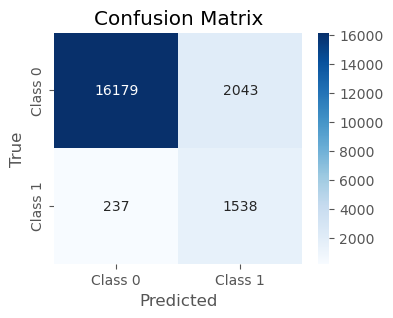

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, lr_pred)

# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Performance Evaluation 
print('Accuracy:')
accuracy = accuracy_score(y_test, lr_pred)
print(accuracy)

print('\nPrecision:')
precision = precision_score(y_test, lr_pred)
print(precision)

print('\nRecall:')
recall = recall_score(y_test, lr_pred)
print(recall)

print('\nF1 score:')
f1 = f1_score(y_test, lr_pred) 
print(f1)

print('\nROC AUC score:')
roc_auc = roc_auc_score(y_test, lr_pred)
print(roc_auc)

Accuracy:
0.8859828974346152

Precision:
0.42948896956157495

Recall:
0.8664788732394366

F1 score:
0.5743091859596714

ROC AUC score:
0.877180826148859


In [ ]:
train_accuracy = accuracy_score(y_train_resampled, logreg_gs.predict(X_train_resampled))
print('Training Accuracy: ' + str(train_accuracy))

Training Accuracy: 0.8859746109746109


In [ ]:
# Predictions
pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred}) \
    .sample(10)

,Actual,Predicted
29835,0,0
92915,0,0
80304,0,0
85054,0,0
9266,0,0
44710,0,0
3029,1,1
81469,0,0
51117,0,0
51916,0,0


In [ ]:
results = pd.DataFrame([['With outliers, Non-normalized data', train_accuracy, accuracy, precision, recall, f1, roc_auc]], 
                       columns = ['Logistic Regression Model', 'Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

summary = pd.concat([summary, results], ignore_index=True)
summary

,Logistic Regression Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,"Without outliers, Normalized data",0.868413,0.856713,0.276490,0.878947,0.420655,0.867131
1,"With outliers, Normalized data",0.884152,0.888083,0.435890,0.886761,0.584478,0.887486
2,"Without outliers, Non-normalized data",0.870186,0.854428,0.269145,0.850877,0.408938,0.852764
3,"With outliers, Non-normalized data",0.885975,0.885983,0.429489,0.866479,0.574309,0.877181
